  ## Beam Calculations for Garage Door King Studs

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
from ipywidgets.widgets import interact
import ipywidgets
#del ipywidgets

In [26]:
def moment(p,L,x):
    """Calculate the moment of a uniformly loaded beam of 
    length L (in) at point x (in), with a load of p (lbf/in).
    
    Returns the moment in in*lbf
    """
    return 1/2.*p*(L-x)*x

In [25]:
# Beam Geometry
def Irect(b,h):
    """Compute the moment of inertia of a rectangle around its neutral axis.
    b: width of beam in inches
    h: height of beam in inches
    
    Returns moment of inertia, I (in^4)"""
    return(1/12.0*b*h**3)

i = Irect(1.5,3.5)  #in^4
a = 3.5*1.5  #in^2
c=3.5/2

print (
"""Beam characteristics:
           A= {a} in^2
           I ={i} in^4
           c ={c} in""".format(i=i,c=c,a=a))


Beam characteristics:
           A= 5.25 in^2
           I =5.359375 in^4
           c =1.75 in


In [23]:
def plot_moment(width,lbpsf,L_feet,xi,tbf,I,c):
    lbf_ft=width/2.0*lbpsf
    x=np.arange(0,L_feet*12)
    y=moment(lbf_ft/12.0,L_feet*12,x)
    plt.plot(x,y)
    plt.axvline(xi*12.)
    plt.xlabel('inches')
    plt.ylabel('in-lbf')
    moi = moment(lbf_ft/12.0,L_feet*12.0,xi*12)
    stress= moi*c/(tbf*I)
    print ("Moment at {x}\' = {m} in-lbf = {mp} ft-lbf".format(x=xi,m=moi,mp=moi/12))
    print ("stress at skin = {s} psi ".format(s=stress))



# Controls

* width is Width of opening in feet
* lbpsf is punds per square foot wind load
* L_feet is the height of the wall
* xi is the point of interest (where the joint is)
* tbf is the number of 2x4s

# Outputs

* moment is the torque to be resisted at the joint
* stress is the tensile stress at the inner surface of the king studs

Moment at 8.0' = 12672.0 in-lbf = 1056.0 ft-lbf
stress at skin = 6620.47346939 psi 


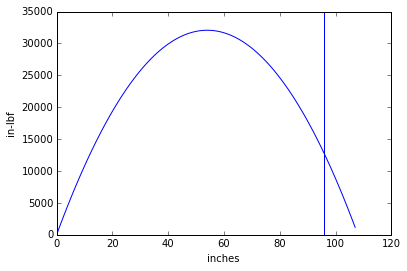

In [35]:
interact(plot_moment,
        lbf_ft=ipywidgets.FloatSlider(min=0,max=300,step=5.0,value=33),
        lbpsf=ipywidgets.FloatSlider(min=0,max=40,step=1., value=33),
        width=ipywidgets.FloatSlider(min=0,max=16,step=1.,value=16),
        L_feet=ipywidgets.FloatSlider(min=0,max=12,step=0.25,value=9.),
        xi=ipywidgets.FloatSlider(min=0,max=12,step=1/12.,value=8.),
        tbf=ipywidgets.FloatSlider(min=1,max=10,step=1,value=1),
        c=(0,6,0.1),
        I=ipywidgets.RadioButtons(options={'2x4':Irect(1.5,3.5),'2x6':Irect(1.5,5.5),'Tee':43}))  # I2x4 =    

In [7]:
# T of 12" x 1/2" over 2x4:
na=(12*.5*.25-3.5*1.5*1.75)/(0.5*12+3.5*1.5)
                         
print "Neutral Axis at {}".format(na)

def Irect(b,h):
    return(1/12.0*b*h**3)

Itee = Irect(12,.5)+12*.5*(.25 - na )**2 + Irect(1.5,3.5)+1.5*3.5*(1.75-na)**2
print ("Moment of Inertia of T shape = {i} with c=({c1},{c2})".format(
        c1=1.75-na,c2=-(0.25-na),i=Itee))


Neutral Axis at -0.683333333333
Moment of Inertia of T shape = 41.796875 with c=(2.43333333333,-0.933333333333)


In [40]:
%pylab inline  
# gives np plt
#?%pylab

Populating the interactive namespace from numpy and matplotlib


56.08333333333333

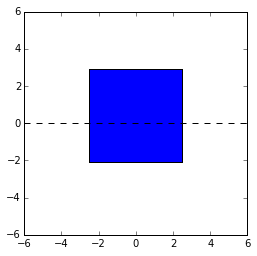

In [65]:
import ipywidgets
import matplotlib.patches as patches

#?ipywidgets.RadioButtons
#?ipywidgets.widget_selection._Selection

def f(a, b,c):
    plt.plot([-a,a],[-b+c,b+c],'   ')
    gca().add_patch(Rectangle((-a/2,-b/2+c),a,b))
    gca().set_aspect('equal')
    gca().axhline(0, linestyle='--', color='k') # horizontal lines
    return 1.0/12*a*b**3+a*b*c**2


w=ipywidgets.interactive(f, a=(0,10.0), b=(0,10.0),c=(-10.0,10))
display(w)



In [63]:
print "Moment of inertia for {k} is {i} units^4".format(k=w.kwargs,i=w.result)


Moment of inertia for {'a': 1.5, 'c': 1.3, 'b': 3.5} is 14.231875
